In [1]:
import networkx as nx
G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
H = G.subgraph([0, 1, 2])
list(H.edges)

[(0, 1), (1, 2)]

import networkx as nx

4
<class 'list'>
NOCS
8


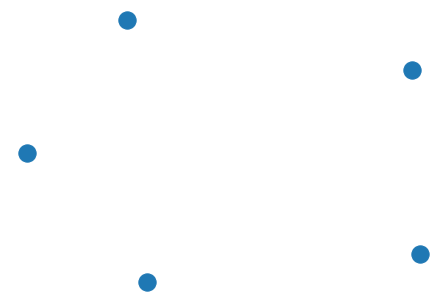

In [2]:
G = nx.Graph()
early_atoms = ['N','O','C','S']
attrs = {'C': {'OS':4, 'valence_electrons': 4, 'n_cur': 0}, 'N': {'OS':-3, 'valence_electrons': 5, 'n_cur': 0}, 'O': {'OS':-2, 'valence_electrons': 6, 'n_cur': 0}, 'S': {'OS':-2, 'valence_electrons': 6, 'n_cur': 0}}
G.add_nodes_from(early_atoms)
nx.set_node_attributes(G, attrs)
print(G.nodes['C']['OS'])

a = list(G.nodes())
print(type(a))
# print(a)
new = ''
for i in range(len(a)):
    new+=a[i]
print(new)
G.add_node(new)
nx.draw(G)
attrs = {**attrs, **{new: {'OS':8, 'valence_electrons': 4, 'n_cur': 0}}}
nx.set_node_attributes(G, attrs)
print(G.nodes[new]['OS'])

In [3]:
def formal_charge(os,v,n_cur): #n_cur is basically the degree of the node which is the numbr of covalent bonds
    f = v - n_cur - (v+os)
    return f


In [4]:
def sub2node(G,H):
    
    attrs = nx.get_node_attributes(G)
    # H is a subgraph of G
    a = list(H.nodes())
    new = ''
    for i in range(len(a)):
        new+=a[i]
    G.add_node(new)
    
    os = 0
    v_elec = 0
    
    for node in H.nodes():
        v_elec+=H.nodes[node]['valence_electrons']
        a = H.nodes[node]['OS']
        b = H.nodes[node]['valence_electrons']
        c = H.nodes[node]['n_cur']
        os+=formal_charge(a,b,c)
    
    attrs = {**attrs, **{new: {'OS':os, 'valence_electrons': v_elec, 'n_cur': 0}}}
    nx.set_node_attributes(G, attrs)
    
    return G
